In [35]:
import os

from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier


sns.set_theme(style="whitegrid")
import numpy as np
import pandas as pd


from kmodes.kmodes import KModes
from scipy.spatial.distance import cdist
from yellowbrick.cluster import silhouette_visualizer

In [36]:
from settings import PATH, DATABASE_PATH
csv = "penguins_size.csv"

In [37]:
df = pd.read_csv(os.path.join(DATABASE_PATH, csv))
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [38]:
df.replace('.', float('NAN'), inplace=True)
df = df.dropna(how="all")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [39]:
x = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','body_mass_g']]
y = df['species']

In [40]:
print(x)

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0                39.1             18.7              181.0       3750.0
1                39.5             17.4              186.0       3800.0
2                40.3             18.0              195.0       3250.0
3                 NaN              NaN                NaN          NaN
4                36.7             19.3              193.0       3450.0
..                ...              ...                ...          ...
339               NaN              NaN                NaN          NaN
340              46.8             14.3              215.0       4850.0
341              50.4             15.7              222.0       5750.0
342              45.2             14.8              212.0       5200.0
343              49.9             16.1              213.0       5400.0

[344 rows x 4 columns]


In [41]:
print(y)

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object


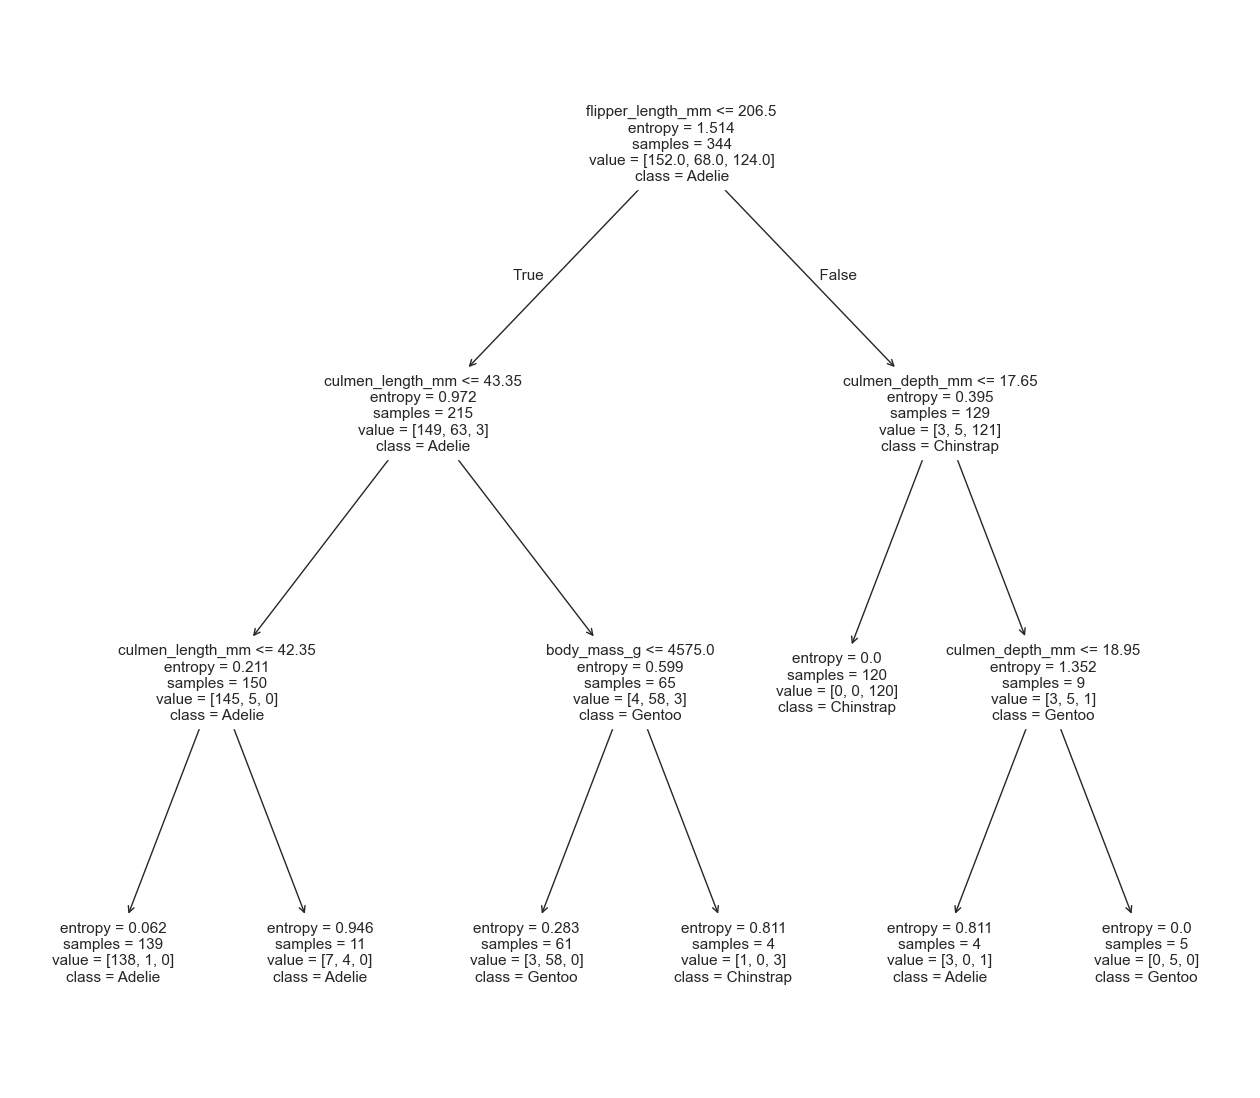

In [42]:
dt = DecisionTreeClassifier(max_depth=3, criterion='entropy')
dt_model = dt.fit(x, y)
fig = plt.figure(figsize=(16, 14))
tree.plot_tree(dt_model, feature_names=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','body_mass_g'], class_names=['Adelie', 'Gentoo', 'Chinstrap'])
plt.show()

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2)

In [12]:
print(y_train)

154    Chinstrap
103       Adelie
228       Gentoo
192    Chinstrap
211    Chinstrap
         ...    
259       Gentoo
196    Chinstrap
251       Gentoo
311       Gentoo
145       Adelie
Name: species, Length: 275, dtype: object


In [23]:
dt = DecisionTreeClassifier(max_depth=3, criterion='entropy')
dt_model = dt.fit(x_train, y_train)
train = dt_model.score(x_train, y_train)
test = dt_model.score(x_test, y_test)

In [28]:
print(train)
print(test)

0.9781818181818182
0.9420289855072463


In [26]:
dt = DecisionTreeClassifier(max_depth=3, criterion='gini')
dt_model = dt.fit(x_train, y_train)
train = dt_model.score(x_train, y_train)
test = dt_model.score(x_test, y_test)

In [27]:
print(train)
print(test)

0.9781818181818182
0.9420289855072463


In [29]:
y_pred = dt_model.predict(x_test)

In [30]:
print(confusion_matrix(y_test, y_pred))

[[29  1  1]
 [ 1 12  0]
 [ 1  0 24]]


In [31]:
print(accuracy_score(y_test, y_pred)*100)

94.20289855072464


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.94      0.94      0.94        31
   Chinstrap       0.92      0.92      0.92        13
      Gentoo       0.96      0.96      0.96        25

    accuracy                           0.94        69
   macro avg       0.94      0.94      0.94        69
weighted avg       0.94      0.94      0.94        69

